## Graph Visualization Maker

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter

In [5]:
import seaborn as sns
import matplotlib.colors as mcolors

In [6]:
palette = sns.color_palette("Set2", 7)

# Converting the new palette colors to hex format
hex_colors = [mcolors.rgb2hex(color) for color in palette]

In [9]:
labels = ["Bilinear","ESPCNN","EDSR", "Single Diffusion","U-Net","Ensemble Diffusion"]

In [10]:
mses = []
psnrs = []
ssims = []

methods = ["baseline","espcn","edsr", "diffusion","unet","ensemble"]#"baseline",
metrics = ["mse","psnr","ssim"]

colors = ["lightblue", "darkred", "teal", "orange", "pink", "gold"]
colors = hex_colors

In [11]:
for method in methods:
    
    mses.append(np.load("./numerical_results/"+method+"2020_mses.npy")) 
    psnrs.append(np.load("./numerical_results/"+method+"2020_psnrs.npy"))
    ssims.append(np.load("./numerical_results/"+method+"2020_ssims.npy"))
    
print("MSE")
print("---------")
for i in range(len(methods)):
    print(methods[i].ljust(12) + " " , mses[i].mean())
print("---------")
print("PSNR")
print("---------")
for i in range(len(methods)):
    print(methods[i].ljust(12) + " " , psnrs[i].mean())
print("---------")
print("SSIM")
print("---------")
for i in range(len(methods)):
    print(methods[i].ljust(12) + " " , ssims[i].mean())

MSE
---------
baseline      0.00238519486254904
espcn         0.0012571999640123156
edsr          0.0011494144205628585
diffusion     0.0011374514631845138
unet          0.001107915567667545
ensemble      0.0010295234065934068
---------
PSNR
---------
baseline      26.678920946015747
espcn         29.314610085181798
edsr          29.707596118244027
diffusion     29.849914241529603
unet          29.886322595452814
ensemble      30.328831435818337
---------
SSIM
---------
baseline      0.7120680397654988
espcn         0.775600035027492
edsr          0.7976718762530447
diffusion     0.8313321109735392
unet          0.8200068408455414
ensemble      0.845582825827939


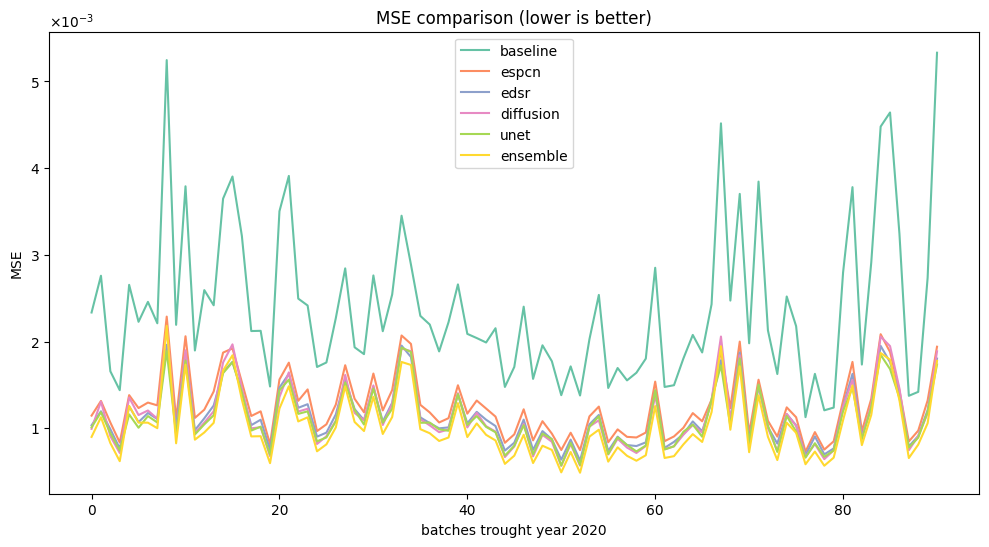

In [12]:
plt.figure(figsize=(12, 6))

for i in range(len(methods)):
    plt.plot(mses[i], label = methods[i], color = colors[i])
    
# Set the x and y axis labels
plt.xlabel('batches trought year 2020')
plt.ylabel('MSE')
plt.title("MSE comparison (lower is better)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)

# Display the legend
plt.legend()

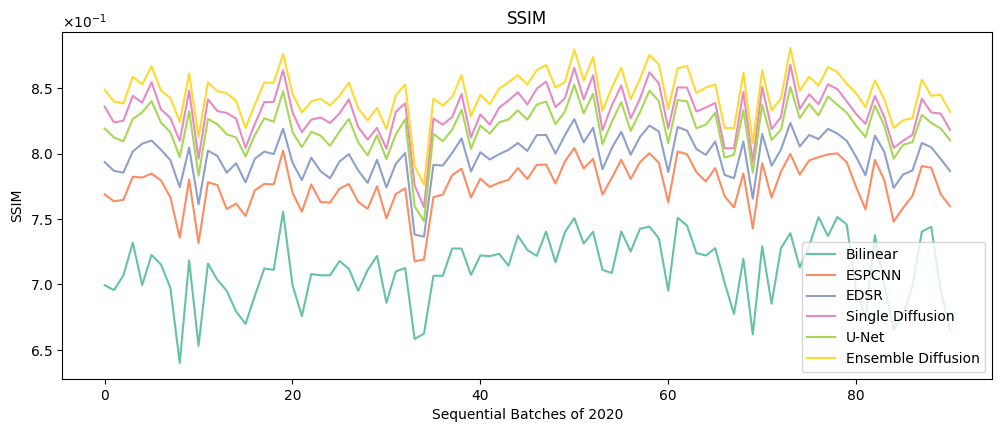

In [22]:
plt.figure(figsize=(12, 4.5))

for i in range(len(methods)):
    plt.plot(ssims[i], label = labels[i], color = colors[i])
    
# Set the x and y axis labels
plt.xlabel('Sequential Batches of 2020')
plt.ylabel('SSIM')
plt.title("SSIM")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)

# Display the legend
plt.legend()

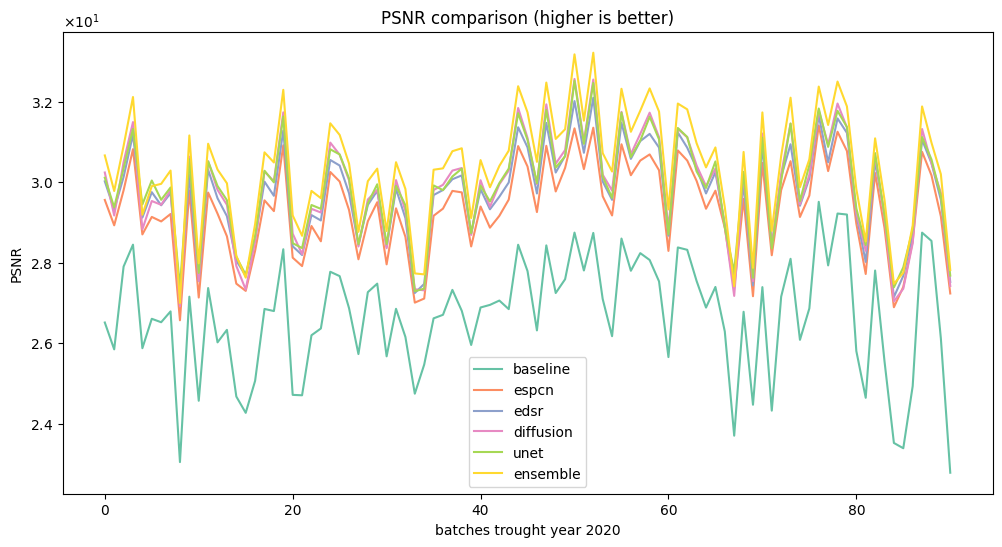

In [14]:
plt.figure(figsize=(12, 6))

for i in range(len(methods)):
    plt.plot(psnrs[i], label = methods[i], color = colors[i])
    
# Set the x and y axis labels
plt.xlabel('batches trought year 2020')
plt.ylabel('PSNR')
plt.title("PSNR comparison (higher is better)")

formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
plt.gca().yaxis.set_major_formatter(formatter)

# Display the legend
plt.legend()